<div id="container" style="position:relative;">
<div style="float:left"><h1> PyTorch </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

### Introduction

Today, we will introduce Torch for Python (`PyTorch`), a deep learning library developed by Facebook and Uber. PyTorch is quickly becoming one of the dominant tools for building deep learning systems in both academic and industry settings.

In [1]:
import torch

# comment this out if you don't have tqdm
from tqdm.notebook import tnrange, tqdm_notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Torch tensors

At the centre of any `PyTorch` system, or really any deep learning system, is a **tensor**. A tensor is just a fancy name for a high dimensional array of numbers. We have seen tensors before:
* vectors are first order tensors,
* two dimensional arrays (matrixes) are second order tensors, and
* higher dimensional arrays are third, fourth, etc' order tensors.

They are essentially just NumPy arrays re-implemented in `PyTorch`. They are built to interact with other PyTorch features and run on Graphical Processing Units (GPUs). Because GPUs are quite expensive, modern ones run upwards of ten-thousand dollars, we won't take advantage of GPU functionality in this course, but whatever code we write here can easily be ported to any GPU we have access to.

Declaring a PyTorch tensor is exactly the same as declaring a NumPy array:

In [2]:
# using the ones function
x = torch.ones(2, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [3]:
# create a tensor with the same values at every position
x = torch.full((3, 3), 3.14, dtype=torch.float64)
print(x)

tensor([[3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400]], dtype=torch.float64)


Like NumPy arrays we can combine tensors with scalar values and each other:

In [4]:
#Combining two torch tensors
x = torch.full((3, 3), 3, dtype=torch.float64)
y = torch.randn(3, 3)
z = x + y

In [5]:
x

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], dtype=torch.float64)

In [6]:
y

tensor([[ 0.6872, -1.8529,  0.8687],
        [-1.3760,  0.1279,  0.5864],
        [ 0.0333, -1.9994, -1.2453]])

In [7]:
z

tensor([[3.6872, 1.1471, 3.8687],
        [1.6240, 3.1279, 3.5864],
        [3.0333, 1.0006, 1.7547]], dtype=torch.float64)

In [9]:
# combining a tensor with a scalar
c = 4
z = c * x
print(z)

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]], dtype=torch.float64)


Since a tensor is essentially a NumPy array, we won't go into any more detail. We just need to know that anything you can do with a NumPy array you can also do with a PyTorch tensor (maybe with a slight change of syntax).

#### Exercise 1

1. Create the following tensors:
    
    * `x`: a tensor of shape (2, 1, 3) of random floats between 1 and 5. What does shape 1 in the middle mean?
    * `y`: a tensor of shape (2, 3) that holds the integers from 0 to 5.
    
    
2. Look up what the `squeeze` and `unsqueeze` commands do in `torch`.
    
    * What happens if you squeeze `x`?
    * What happens if you unsqueeze `y`? (Hint: try 0, 1 and 2 for the `dim` argument and check the shapes.)

#### Solution

We will use `torch.rand` that samples from the uniform distribution on [0, 1]. We can shift and scale that appropriately to get what we need:

In [22]:
# Q1.1 Creating the given tensors.

# torch.rand
x = 1 + (5 - 1) * torch.rand(2, 1, 3)
y = torch.arange(0, 6).reshape(2, 3)



In [16]:
x

tensor([[[3.8048, 2.2541, 3.9648]],

        [[2.7981, 4.5959, 3.5989]]])

In [17]:
y

tensor([[0, 1, 2],
        [3, 4, 5]])

In [18]:
torch.rand(2, 4, 3)

tensor([[[0.3507, 0.7634, 0.5990],
         [0.9898, 0.3123, 0.9639],
         [0.7627, 0.2381, 0.9471],
         [0.9965, 0.4426, 0.0176]],

        [[0.3315, 0.2651, 0.5965],
         [0.1817, 0.2738, 0.3135],
         [0.0795, 0.9647, 0.9164],
         [0.9198, 0.3110, 0.4417]]])

In [19]:
torch.rand(1, 5, 7)

tensor([[[0.0239, 0.3403, 0.0356, 0.1130, 0.3249, 0.5768, 0.4160],
         [0.9007, 0.4843, 0.9372, 0.5889, 0.8328, 0.5053, 0.0507],
         [0.5467, 0.8381, 0.6776, 0.4405, 0.9604, 0.8366, 0.9936],
         [0.8632, 0.8744, 0.4707, 0.2539, 0.8256, 0.7761, 0.4491],
         [0.0492, 0.5309, 0.4888, 0.4517, 0.3048, 0.9702, 0.2523]]])

In [20]:
torch.rand(2, 1, 3)

tensor([[[0.0531, 0.6512, 0.8791]],

        [[0.6445, 0.0881, 0.5062]]])

In [21]:
torch.rand(2,4, 3)

tensor([[[0.0010, 0.2191, 0.2121],
         [0.9512, 0.6934, 0.2212],
         [0.9399, 0.4629, 0.9834],
         [0.9736, 0.5434, 0.1126]],

        [[0.7123, 0.2871, 0.1518],
         [0.9707, 0.7396, 0.0836],
         [0.3892, 0.0120, 0.9291],
         [0.6082, 0.2836, 0.7585]]])

Now, to try the squeeze and unsqueeze method:

In [23]:
# Q1.2 Experimenting with squeeze and unsqueeze.

print(f"x shape before squeeze: {x.shape}\n\n")
print(f"x shape after squeeze: {x.squeeze().shape}\n")
print(x.squeeze(), "\n\n")

print(f"y shape before unsqueeze: {y.shape}\n\n")

for dim in [0, 1, 2]:
    print(f"y shape after unsqueeze at dim {dim}: {y.unsqueeze(dim=dim).shape}\n")
    print(y.unsqueeze(dim=dim), "\n")

x shape before squeeze: torch.Size([2, 1, 3])


x shape after squeeze: torch.Size([2, 3])

tensor([[4.4329, 2.3124, 3.1542],
        [4.2928, 1.1767, 1.6687]]) 


y shape before unsqueeze: torch.Size([2, 3])


y shape after unsqueeze at dim 0: torch.Size([1, 2, 3])

tensor([[[0, 1, 2],
         [3, 4, 5]]]) 

y shape after unsqueeze at dim 1: torch.Size([2, 1, 3])

tensor([[[0, 1, 2]],

        [[3, 4, 5]]]) 

y shape after unsqueeze at dim 2: torch.Size([2, 3, 1])

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]]) 



These methods help us introduce new 'empty' dimensions along which the array has length 1, or to get rid of such. These methods come very handy when reshaping arrays to fit certain model architectures.

### Backpropagation and Autograd

Recall that when neural networks are trained, there are two separate phases:

1. In the **forward pass phase**, we pass the input through the network transforming it in each layer until we reach the output.
    * At the final output layer, we make our prediction and calculate our loss (or prediction error).
    
    
<img src="https://drive.google.com/uc?export=view&id=1FVcvkNzLH0cfz7eImr4bPJf2GkJfVmBj"/>

<center> <i>Image prepared using <a href="https://alexlenail.me/NN-SVG/index.html">NN-SVG</a></i> </center>

2. In the **backpropagation phase**, we update the network weights according to the training error gradient.
    * The gradient tells us what weight change corresponds to a decreased loss.

<img src="https://drive.google.com/uc?export=view&id=1tHwi8veILHxruKh_M5AKdWACpMl7WZPw"/>
<center> <i>Image prepared using <a href="https://alexlenail.me/NN-SVG/index.html">NN-SVG</a></i></center>

The second phase can be very difficult as modern networks are highly complex and the gradient calculation is not so easy. This is true especially if we have have complex connections.

PyTorch takes care of calculating the gradient for us, when we combine tensors with each other, just like a network combines different layers. When we define a tensor we just need to indicate that we want to keep track of the gradient.

In [28]:
# specify we need the gradient
x = torch.tensor(3., requires_grad=True)
print(x)

tensor(3., requires_grad=True)


In [29]:
y = x**2 + 3
print(y)

tensor(12., grad_fn=<AddBackward0>)


Let's plot our function, the data point and the tangent line:

<img width=400 src="https://drive.google.com/uc?export=view&id=1QogK1NDTeri34LmOGPQQ-QVWsw6lkRo3"/>

What is the gradient of `y` with respect `x`? Thinking geometrically, the gradient gives you the slope of the tangent line at `x=2`. You can already read it from the plotting script that the slope is 4 (or use some calculus).

$$\frac{\Delta y}{\Delta x} = 2x$$

So when $x = 2$, $2x = 4$. This is stored in the `x.grad` attribute after calling the `backward()` method on the tensor:

In [30]:
# calculate gradients which are then stored at the variables
y.backward()



In [31]:
print(x.grad)

tensor(6.)


When `y` will correspond to a loss and `x` to model weights, we can use this gradient to change `x` (the weights) by following the gradient and stepping towards a lower `y` (loss) value.

For much more complicated operations, we can still get the gradients using this method and this is a very powerful tool. We can custom-design almost any network architecture and we automatically get the backpropagation done for us. This is incredibly useful, especially on massive networks with millions of complex connections.

### Defining layers and neural networks

The key to building neural networks is combining multiple layers of linear and non-linear functions. This is easy enough in PyTorch. Let's build a network which classifies solves the `breast_cancer` binary classification task. For this, we first load in the data using `sklearn` and turn the `numpy` arrays into `torch` tensors.

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Let's use the breask cancer data for this:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

# We have to turn the data into tensors, and in this case,
# convert the type from np.float64 to torch.float32
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([455, 30]) torch.Size([455]) torch.Size([114, 30]) torch.Size([114])


If we only wanted to implement a linear network we can do this with the `Linear` connection functions:

In [33]:
import torch.nn as nn

In [34]:
# Go from size 30 to size 8.
# This means we have 30 input features, and we are pushing them through
# the network to a hidden layer of size 8
layer_1 = nn.Linear(30, 8)

In [35]:
# Go from size 8 to size 2, from the 8 neuron hidden layer to a 2 neuron output layer
layer_2 = nn.Linear(8, 2)

Each layer has a `forward` method that calculates the output of the layer for a given input. But you can simply call the layer to get the same result:

In [36]:
x = X_train[[0], :] # one data point with 30 features

# Run the data through the layers
hidden_values = layer_1(x)
output_values = layer_2(hidden_values)

print(output_values)

tensor([[-0.2179,  0.5769]], grad_fn=<AddmmBackward0>)


This was easy enough, although we should probably use the softmax activation for the top layer so that it follows a proper probability distribution. Briefly, if the output of a layer is $x=(x_1,\cdots , x_d)$ then the softmax output for element $i$ is:

$$softmax(x_i) = \frac{exp(x_i)}{\sum_j exp(x_j)}$$

This softmax formula ensures that the output of the last layer corresponds to probabilities: numbers between 0 and 1 with total sum equal to 1.

In [37]:
x = X_train[[0], :] # one data point with 30 features

# define the layers of our neural network
layer_1 = nn.Linear(30, 8)
layer_2 = nn.Linear(8, 2)

# Run the data through a linear layer
hidden_values = layer_1(x)
hidden_values = layer_2(hidden_values)

# Notice this is a function, not a layer as in TensorFlow
output_values = nn.functional.softmax(hidden_values, dim=1) # makes sure that the output sums to 1 in dimension 1

print(output_values)

tensor([[0.4193, 0.5807]], grad_fn=<SoftmaxBackward0>)


PyTorch has a `Sequential` module that can be used to simplify working with models that pass tensors sequentially through layers. Let's redo our example:

In [39]:
# just provide the layers as arguments
neural_net = nn.Sequential(nn.Linear(30, 8),
                          nn.Linear(8, 2))
neural_net

Sequential(
  (0): Linear(in_features=30, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=2, bias=True)
)

In [40]:
output_logit_values = neural_net(x)
output_values = nn.functional.softmax(output_logit_values, dim=1)
print(output_values)

tensor([[0.4444, 0.5556]], grad_fn=<SoftmaxBackward0>)


Why did we get a different result now from the same input and same model? The layers (by default) are always initialized with random weights following a certain distribution so when we re-created the model, we initilized with different weights.

When training neural networks, we need to compare our output to a target value. We can calculate how far the output is from the target, which is called the *loss*, and use that measurement to train our network.

How we take the difference between the target and output can have an impact on performance. For now, we will use the **cross entropy loss** which is the most prominent loss function for classification. For this, we can actually **skip the softmax layer** in the network because that calculation is built into the `CrossEntropyLoss`.

In [41]:
# the same model except the softmax
neural_net = nn.Sequential(nn.Linear(30, 8),
                           nn.Linear(8, 2),)

# the loss expects the data in batches so we have to specify even if we only have
# one data point
x = X_train[[0], :]
target = y_train[[0]]

# FORWARD PASS
output_values = neural_net(x)

# take the Cross Entropy Loss (includes the softmax calculation so we don't need that in the neural_net)
cross_entropy_loss = nn.CrossEntropyLoss()
loss = cross_entropy_loss(output_values, target)

print(loss)

tensor(0.5484, grad_fn=<NllLossBackward0>)


At this point we have a network, we can do a forward pass and calculate the loss.

However, we still haven't done anything to train it. To do training we take the loss and propagate it backwards through the network. Let's do that next!

#### Exercise 2

1. Look up the different built-in activation functions in the `torch.nn` module.

2. Build a deep neural network using the `Sequential` class that includes linear layers and three different types of activations in-between. The input dimension should be 100 and the output 10. You decide the hidden layer size!

3. Test your network by passing through a tensor.

#### Solution

There are a number of available activation functions, some classical include `Sigmoid`, `Tanh`, `ReLU`.

We can build a simple network using these with input dim 100 and 10 output units.

In [42]:
# Q2.2 Building a deep neural net

neural_net = nn.Sequential(nn.Linear(100, 64),
                        nn.Sigmoid(),
                        nn.Linear(64, 32),
                        nn.Tanh(),
                        nn.Linear(32, 16),
                        nn.ReLU(),
                        nn.Linear(16, 10))

It is always advised to run a quick sanity check to test the model:

In [43]:
# Q2.3 testing with a random tensor
x = torch.rand(1, 100)
output = neural_net(x)
print(output.shape)

torch.Size([1, 10])


### Training neural networks

To recap the training procedure, we need to
* pass forward the input tensor through the network,
* backpropagate and calculate the gradients, and
* update the network weights to decrease loss.

Let's set up a model and loss function as before:

In [47]:
# a single data point
x = X_train[[0], :]
target = y_train[[0]]

# MODEL: setting up our network with an extra activation function and the loss
neural_net = nn.Sequential(nn.Linear(30, 8),
                           nn.ReLU(),
                           nn.Linear(8, 2)
                          )
# Cross Entropy Loss (includes the softmax calculation so we don't need that in the neural_net)
cross_entropy_loss = nn.CrossEntropyLoss()

The network parameters are stored in a generator that we can look into - converting into a list, each element will be the weights for the individual layers:

In [48]:
list(neural_net.parameters())[0].shape # the parameters for our 30 X 8 first layer

torch.Size([8, 30])

#### 1. The forward pass

We just pass the input and the network takes care of everything:

In [49]:
# FORWARD PASS
output_values = neural_net(x)
loss = cross_entropy_loss(output_values, target)

print(loss)

tensor(0.8115, grad_fn=<NllLossBackward0>)


You can check that there are no gradients stored yet.

In [50]:
print(list(neural_net.parameters())[0].grad)

None


#### 2. The backward pass

We use `backward` as before to calculate the gradients:

In [51]:
# BACKWARD PASS
loss.backward()

We can see that the gradients are populated:

In [52]:
list(neural_net.parameters())[0].grad.shape # Now we have 30 X 8 gradients (weight adjustments) for
                                            # our 30 X 8 weight first layer

torch.Size([8, 30])

In [ ]:
#list(neural_net.parameters())[0].grad

#### 3. Update the model weights

<center>
<img width="400px" src="https://drive.google.com/uc?export=view&id=132EC8scZRTefNsBLaWxE7pU6AqoQGPPI"/>
</center>
<br/>

The weight update is handled by optimizers in PyTorch. Standard choices include `SGD` (Stochastic Gradient Descent) or `Adam`. The optimizer objects needs the model parameters when initialized and other hyperparameters as arguments, such as the *learning rate*.

The learning rate defines how large are the steps that we take when we follow the gradient in the weight updates and move towards lower loss values. A large learning rate can make training faster initially but it can also overshoot and jump over an optimal weight. A standard choice for learning rate is `1e-3`.

Once we have our weight adjustments $\frac{\delta L}{\delta W}$ (change in loss function based on weights), and our learning rate $\alpha$, we update the weights according to the following formula:

$$W_{new} = W_{old} - \alpha \frac{\delta L}{\delta W}$$
    
Where we subtract the adjustments to get to a minimum of the loss.

In [53]:
# setup optimizer (this is only done once, usually with model setup)
optimizer = torch.optim.SGD(neural_net.parameters(), lr=0.1)

# UPDATE WEIGHTS: the optimizer uses the gradients stored in the neural net and makes a weight update
optimizer.step()

Hopefully, we will see a lower loss if we do a forward pass again:

In [54]:
new_output = neural_net(x)
new_loss = cross_entropy_loss(new_output, target)
print(f"Old loss: {loss}\nNew loss: {new_loss}")

Old loss: 0.811467170715332
New loss: 0.5947777032852173


### Putting it All Together


Let's put our example all together now

In [55]:
x = X_train[[0], :]
target = y_train[[0]]

# MODEL: setting up our network with an extra activation function and the loss
neural_net = nn.Sequential(nn.Linear(30, 8),
                           nn.ReLU(),
                           nn.Linear(8, 2))
cross_entropy_loss = nn.CrossEntropyLoss()

# setup optimizer (this is only done once, usually with model setup)
optimizer = torch.optim.SGD(neural_net.parameters(), lr=0.1)

# FORWARD PASS
output_values = neural_net(x)
loss = cross_entropy_loss(output_values, target)

# BACKWARD PASS
loss.backward()

# UPDATE WEIGHTS: the optimizer uses the gradients stored in the neural net and makes a weight update
optimizer.step()

new_output = neural_net(x)
new_loss = cross_entropy_loss(new_output, target)
print(f"Old loss: {loss}\nNew loss: {new_loss}")

Old loss: 1.1329421997070312
New loss: 0.8261891007423401


While the `Sequential` API is really convenient, most PyTorch code is written using Object Oriented Programming.

Most uses of PyTorch to create a neural network will use the `nn.Module` class as follows:

In [ ]:
class SimpleNN(nn.Module):
    """Basic multi-layer architecture."""

    def __init__(self):
        """Define the main components of the network"""
        super(SimpleNN, self).__init__()

        self.layer_1 = nn.Linear(30, 8) # transition from input into hidden layer
        self.activation_1 = nn.ReLU()   # Activation function
        self.layer_2 = nn.Linear(8, 2)  # transition from hidden layer into output

    def forward(self, x):
        """Perform forward pass."""

        # pass through the layers
        hidden_1 = self.activation_1(self.layer_1(x))
        output = self.layer_2(hidden_1)

        # return output
        return output

    def predict(self, x):
        '''
        The class based interface allows you
        add your own functionality, like a familiar
        .predict method we all know and love
        '''

        # Predict class probabilities
        predictions = self.forward(x)

        # Find highest class prediction, notice we don't need to convert to
        # probabilities to do hard predictions, we can simply choose the
        # highest values
        hard_class_predictions = torch.argmax(predictions, dim=1)

        return hard_class_predictions

In [ ]:
# Instantiate the model, the loss criterion, and the optimizer
NN_model = SimpleNN()

cross_entropy_loss = nn.CrossEntropyLoss() # this includes the softmax
optimizer = torch.optim.SGD(NN_model.parameters(), lr=.01, momentum=0.9)

Instead of passing a single data point, we will now pass the whole training set, calculate the losses and the gradients and update the weights 100 times.

In [ ]:
# Now run for 100 epochs
for epoch in tnrange(100, desc="Total epochs: "):

    # Clear gradients (pytorch accumulates gradients by default)
    optimizer.zero_grad()

    # Calculate outputs
    output_values = NN_model(X_train)

    # Calculate loss
    loss = cross_entropy_loss(output_values, y_train)

    # Backpropagation & weight adjustment
    loss.backward()
    optimizer.step()

print(f"Optimization ended successfully")

Total epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Optimization ended successfully


We can now also test our networks performance by moving the data through it

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions
binary_classification = NN_model.predict(X_test)

# Calculate the score on the test set
accuracy = accuracy_score(y_test, binary_classification)
print(f"Accuracy score on test set: {round(accuracy * 100, 2)}%")

Accuracy score on test set: 94.74%


In practice, we would do thousands or even millions of weight updates to get a good model, looping over the forward-backprop-update cycle for each epoch. This is done until the loss and/or other problem-specific metrics converge to an acceptable value or model performance ceases to substantially improve on the validation set (in which further epochs would only result in overfitting).

#### Exercise 3

1. Build a regression neural network using the `Sequential` model for the California Housing dataset. This is a regression problem so remember to choose an appropriate [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions). Use at least 2 hidden layers.

2. Train your model for 100 epochs, and then score it, what scoring metric did you choose and how well did the model perform?

3. Repeat steps 1 and 2 but with the `class` based interface.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

california = fetch_california_housing()

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

my_scaler = StandardScaler()
X_train_scaled = torch.tensor(my_scaler.fit_transform(X_train), dtype=torch.float32)
X_test_scaled = torch.tensor(my_scaler.transform(X_test), dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

#### Solutions

We start out by defining the model, loss and optimizer. Since this is a regression task, we could choose mean squared error or mean absolute error.

In [ ]:
# 1. Build a regression neural network using the `Sequential` model for the California Housing dataset.
#    This is a regression problem so remember to choose an appropriate loss function (If you don't recall,
#    check out the Intro to Neural Network slides)

my_NN = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)


mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(my_NN.parameters(), lr=0.1)

Next, we train the model through 100 epochs. Each steps starts by clearing the previous gradients, a forward pass and loss calculation, a gradient calculation during the backward pass and stepping with the optimizer to adjust the weights.

In [ ]:
# 2. Train your model for 100 epochs, and then score it, what scoring metric did you choose and how well did the
#    model perform?

for epoch in tnrange(100, desc="Total epochs: "):

    # Zero gradients
    optimizer.zero_grad()

    # Calculate gradients using output
    output = my_NN(X_train_scaled)
    loss = mse_loss(y_train, output)

    # Backpropagate
    loss.backward()
    optimizer.step()

Total epochs:   0%|          | 0/100 [00:00<?, ?it/s]

We can evaluate our model by calculating the mean absolute error: how much on average is our prediction off?

In [ ]:
from sklearn.metrics import mean_absolute_error

# Find predictions on test set
test_pred = my_NN(X_test_scaled)

# Calculate MAE, then multiply by 100,000 which is the value of the target (house price in 100,000s)
error = mean_absolute_error(y_test.numpy(), test_pred.detach().numpy()) * 100_000
error = round(error, 2)

print(f"On average, my predictions are ${error} off")

On average, my predictions are $47412.16 off


For practice, we repeat the same model construction by subclassing `nn.Module`:

In [ ]:
# 3. Repeat steps 1 and 2 but with the `class` based interface.

class simple_regression_NN(nn.Module):

    """Basic multi-layer architecture."""

    def __init__(self):
        """Define the main components of the network"""
        super(simple_regression_NN, self).__init__()


        # the data has 8 features

        self.layer_1 = nn.Linear(8, 10) # transition from input into hidden layer
        self.activation_1 = nn.ReLU()   # Activation function
        self.layer_2 = nn.Linear(10, 5)  # transition from hidden layer into output
        self.activation_2 = nn.ReLU()   # Activation function
        self.layer_3 = nn.Linear(5, 1)

    def forward(self, x):
        """Perform forward pass."""

        # pass through the layers
        hidden_1 = self.activation_1(self.layer_1(x))
        hidden_2 = self.activation_2(self.layer_2(hidden_1))
        output = self.layer_3(hidden_2)

        # return output
        return output

In [ ]:
my_NN = simple_regression_NN()

mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(my_NN.parameters(), lr=0.1)

In [ ]:
for epoch in tnrange(100, desc="Total epochs: "):

    # Zero gradients
    optimizer.zero_grad()

    # Calculate gradients using output
    output = my_NN(X_train_scaled)
    loss = mse_loss(y_train, output)

    # Backpropagate
    loss.backward()
    optimizer.step()

Total epochs:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import mean_absolute_error

test_pred = my_NN(X_test_scaled)

error = mean_absolute_error(y_test.numpy(), test_pred.detach().numpy()) * 100_000
error = round(error, 2)

print(f"On average, my predictions are ${error} off")

On average, my predictions are $49816.32 off


As expected, we essentially get the same results. There is some variation due to the model weights being initialized randomly.

### Keras & Tensorflow or PyTorch?

There are many several reasons why organizations might choose one of these frameworks over the other.

Keras and PyTorch follow two different neural network design methodologies; Keras focuses on quickly building and deploying sequential architectures. Building models and training them is easy, but debugging them is difficult since much of the code is abstracted. On the other hand, PyTorch development follows an approach of building the code almost entirely from fundamental building blocks, so every step can be inspected and debugged more easily. Tensorflow has this functionality as well, but since the introduction of Keras it is less frequently used, especially by data scientists (vs. machine learning engineers).

In previous releases of Tensorflow, some neural networks constructed would be limited to a predefined input size (*e.g.* for recurrent neural networkss all sentences must be padded to the same length). This led some organization to switch to PyTorch, which allowed variable size input to be processed for recurrent architectures. Tensorflow 2.0 introduced "[Eager Execution](https://www.tensorflow.org/guide/eager)" which enables this advanced functionality, but the organizations that switched may have much of their infrastructure set up in PyTorch by now.

PyTorch has been the preferred neural network library in academia. This means many new advances in neural networks that come from research might be implemented in PyTorch rather than Tensorflow, though this trend is evolving as the two libraries mature and with the release of TF 2.x and integration of Keras into Tensorflow's core product.

Generally, when going into industry your "choice" of neural network framework will often be dictated by the organization. However, for most projects, both libraries will cover the vast majority of needs for deep learning (albeit implemented in different ways) and only for some unique applications might better suited with the choice of one over the other. Given the option, you should use whichever you are most comfortable with, though a practicing data scientist would of course be expected to be knowledgeable and have a baseline level of proficiency with both frameworks.

Read more on PyTorch vs. Tensorflow: https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/

---------

## Supplementary - Softmax Layers

While we employed the `nn.functional.softmax` function to produce probability distributions from our final layer outputs, you will likely also see the use of the `nn.Softmax` layer in PyTorch.

Since `nn.CrossEntropyLoss()` includes the softmax conversion, we don't need the softmax layer during training, but we **might** need it during prediction. This switch is usually controlled using the `self.training` attribute of neural networks (which is inherited from `nn.Module` for us).

Let's look at an example:

In [ ]:
class SimpleNN(nn.Module):
    """Basic multi-layer architecture."""

    def __init__(self):
        """Define the main components of the network"""
        super(SimpleNN, self).__init__()

        self.layer_1 = nn.Linear(30, 8) # transition from input into hidden layer
        self.activation_1 = nn.ReLU()   # Activation function
        self.layer_2 = nn.Linear(8, 2)  # transition from hidden layer into output

        # Declare a softmax layer
        self.softmax_layer = nn.Softmax(dim=-1)

    def forward(self, x):
        """Perform forward pass."""

        # pass through the layers
        hidden_1 = self.activation_1(self.layer_1(x))
        hidden_2 = self.layer_2(hidden_1)

        # Notice the network will behave differently based on
        # whether it is training or not
        if self.training is True:
            output = hidden_2
        else:
            output = self.softmax_layer(hidden_2)

        # return output
        return output

The network above changes its behavior based on its training status. So when we train it, we can employ the same code as before:

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

# We have to turn the data into tensors, and in this case,
# convert the type from np.float64 to torch.float32
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Instantiate the model, the loss criterion, and the optimizer
NN_model = SimpleNN()

cross_entropy_loss = nn.CrossEntropyLoss() # this includes the softmax
optimizer = torch.optim.SGD(NN_model.parameters(), lr=.01, momentum=0.9)

In [ ]:
# Now run for 100 epochs
for epoch in tnrange(100, desc="Total epochs: "):

    # Clear gradients (pytorch accumulates gradients by default)
    optimizer.zero_grad()

    # Calculate outputs
    output_values = NN_model(X_train)

    # Calculate loss
    loss = cross_entropy_loss(output_values, y_train)

    # Backpropagation & weight adjustment
    loss.backward()
    optimizer.step()

print(f"Optimization ended successfully")

Total epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Optimization ended successfully


This network will not output a probability distribution by default:

In [ ]:
NN_model(X_test[0]) # get the output for the first test data point

tensor([-1.1333,  1.3507], grad_fn=<AddBackward0>)

However, we can switch it to "evaluation mode" to trigger the desired behavior we coded:

In [ ]:
NN_model.eval()
NN_model(X_test[0]) # Now we get the output as a probability distribution

tensor([0.0770, 0.9230], grad_fn=<SoftmaxBackward0>)

And we can switch the behavior back to training mode as well:

In [ ]:
NN_model.train()
NN_model(X_test[0]) # get the output for the first test data point

tensor([-1.1333,  1.3507], grad_fn=<AddBackward0>)

PyTorch is largely designed to be more modular than TensorFlow, and as such requires a stronger knowledge of Object Oriented Programming.

---------

## Supplementary - Image classification using CNNs

Now we'll work through an example of building a network for a complex data set called **CIFAR-10**. It contains color images of various objects with corresponding labels from 10 possibilities. **It is a classification problem and our goal is to predict what object is in the image.**

Right now CIFAR-10 contains 32x32 images with 3 color channels (RGB). You can think of each images as a 32x32x3 tensor. Let's load this data.

In [ ]:
import torchvision

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                     train=True, # whether the train or test set should be loaded
                                     download=True, # download data if necessary
                                    )

100%|██████████| 170498071/170498071 [00:12<00:00, 13302095.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


We can take a sample of the images and use `imshow` from `matplotlib` to take a look at our data.

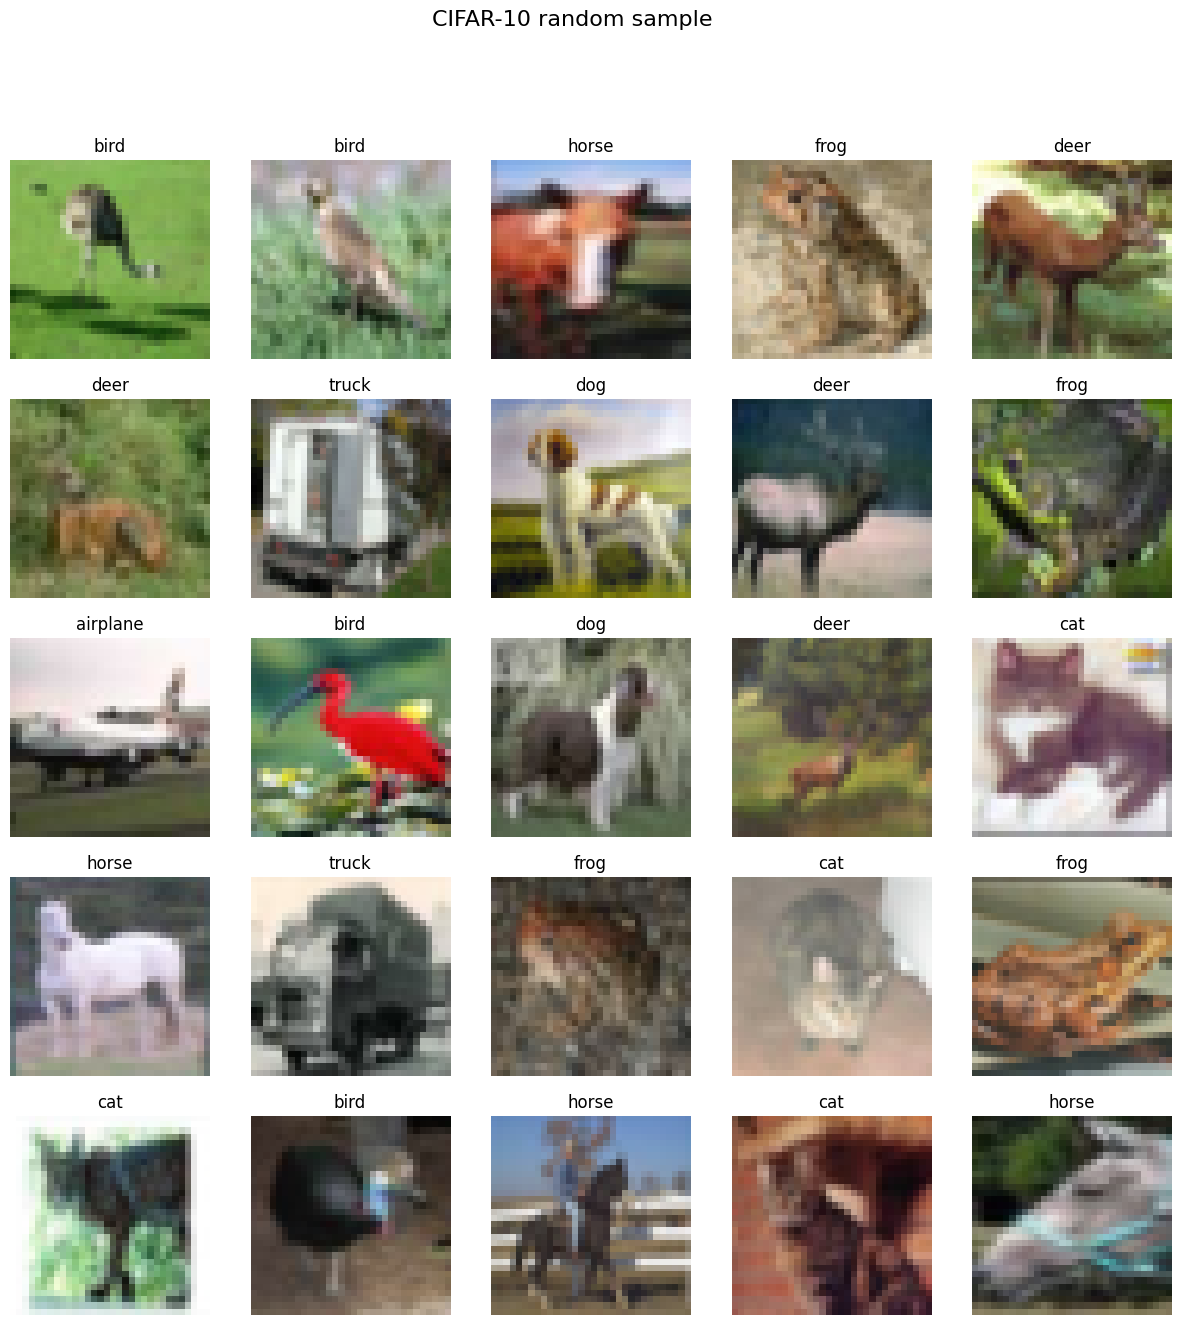

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cifar_classes = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
                4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# select random indices
indices = np.random.choice(len(train_dataset), len(axs.reshape(-1)))

# plot the images in the grid
for index, axs in zip(indices, axs.reshape(-1)):
    image, label = train_dataset[index]
    axs.imshow(image)  # plot the data
    axs.axis('off')
    axs.set_title(cifar_classes[label])

plt.suptitle('CIFAR-10 random sample', fontsize=16)
plt.show()

We can take a look at the class distributions and see that we have a balanced classification task.

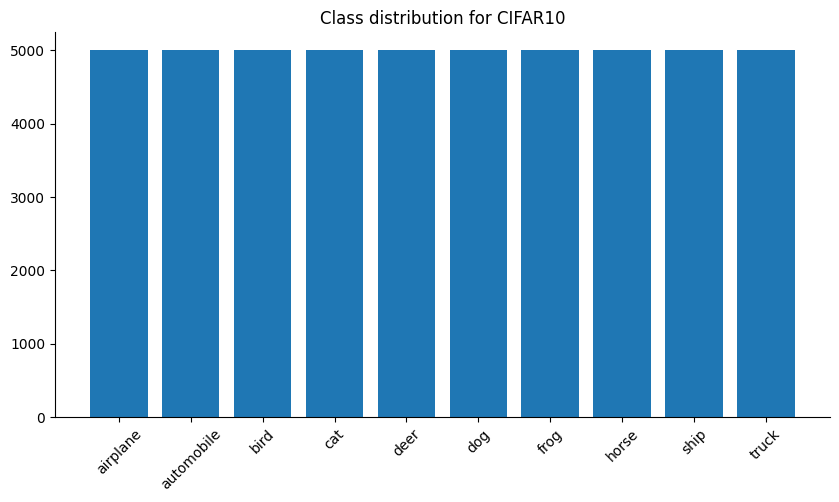

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(cifar_classes.keys(), np.bincount(train_dataset.targets))
ax.set_xticks(list(cifar_classes.keys()))
ax.set_xticklabels(cifar_classes.values(), rotation=45)
plt.title("Class distribution for CIFAR10")
sns.despine()
plt.show()

### Preprocessing

Now, we need to turn the data into a tensor object that `torch` can use and we should also normalize the data to improve classifier performance.  

Both of these goals can be accomplished using the `transforms` package in PyTorch. This is like building a pipeline:

* first we turn the data to a Tensor,
* then we scale it specifying the mean and standard deviation of each color channel.

Now we can load up CIFAR-10 passing along our `pre_process` object to clean and format the data:

In [ ]:
import torchvision.transforms as transforms

# The normalize values are just set to something that tends to work for this dataset... (totally scientific)
pre_process = transforms.Compose([transforms.ToTensor(),  # turn images into tensor
                                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # normalize by
                                                                                           # subtracting 0.5 (mean)
                                                                                           # and dividing by 0.5
                                                                                           # to bring all values from
                                                                                           # [0,1] to [-1, 1]

# reload the train and test data with our preprocessing
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                     train=True,
                     download=True,
                     transform=pre_process
                    )

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                     train=False, # use the test portion of the data
                     download=True,
                     transform=pre_process
                    )

print(f"\nTrain data set size: {len(train_dataset)}\nTest data set size: {len(test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified

Train data set size: 50000
Test data set size: 10000


### Model setup

To actually do classification, we'll use a **convolutional neural network**: this is a highly structured network with complex activation and connections between neurons specifically designed to extract features from complex, high-dimensional data sources.

Larger and deeper examples of this network often achieve state of the art performance on tasks in a variety of areas, especially for computer vision tasks. As before, we need to build the network.

The network we build is essentially sequential and consists of two parts:

* a convolutional part that extracts the image features, and
* a fully-connected part that makes the prediction based on the extracted features.

Between these two parts, we need to reshape our tensors so instead of using two sequential blocks separately, we wrap everything by the `nn.Module` class that is the base class for all neural networks in `torch`. The only thing we need to specify is a `forward` method and after that, we are free to call all the other methods (such as `backward`) that we had for a sequential model before.

We also made the design choice to include the loss and optimizer in the model object, which will make our code look more neat later on.

In [ ]:
class MultilayerCNN(nn.Module):
    """Basic multi-layer CNN architecture."""

    def __init__(self):
        """Define the main components of the network including the loss and optimizer."""
        super(MultilayerCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Convolutional block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Convolutional block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Convolutional block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        ) # the size of the flattened output tensor will be 64*128 // (2*2)


        self.fc_layer = nn.Sequential(
            nn.Linear(64*128 // (2*2), 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10),
        )

        self.softmax_layer = nn.Softmax(dim=1)

        self.cross_entropy_loss = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=.001, momentum=0.9)

    def forward(self, x):
        """Perform forward pass."""
        # pass through the convolutional layers
        x = self.conv_layer(x)

        # flatten the output of the convolution
        x = x.view(x.size(0), -1)

        # pass through the fully connected layers
        x = self.fc_layer(x)

        if not self.training:
            x = self.softmax_layer(x)

        return x

    def predict(self, x):
        '''
        Get hard class predictions from the
        feature data
        '''
        predictions = self.forward(x)

        # Find highest class logit, notice we don't need to convert to
        # probabilities to do hard predictions, we can simply choose the
        # highest values
        hard_class_predictions = torch.argmax(predictions, dim=1)

        return hard_class_predictions

Let's test our model by running a single image through.

In [ ]:
# initialize the model
CNN_model = MultilayerCNN()

# take the first training example
image, label = train_dataset[0]

# pass it through the model
outputs = CNN_model(image.unsqueeze(0))

# find the loss
CNN_model.cross_entropy_loss(outputs, torch.tensor([label]))

tensor(2.2889, grad_fn=<NllLossBackward0>)

Let's talk a bit about the model.

In [ ]:
print(CNN_model)

MultilayerCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
  (softmax_layer): Softmax(dim=1)
  (cross_entropy_loss): CrossEntropyLoss()
)


First, looking at the convolutional layer:

`nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)`

This is a standard convolution operation which takes an image with depth 3 (being the first layer, the RGB channels in our case) and learns a 32-depth convolution using 3-by-3 windows. Next:

`nn.MaxPool2d(kernel_size=2, stride=2)`

This is similar to rolling a convolution window (of size 2x2) with a stride of two pixels but, instead of taking some convolution function, we output the max value in that window. This does two things: it shrinks the image and emphasizes the most prominent values in that window. It is important to note that we pool the max values only along the height and width, not the depth. We apply the pooling to each depth, but we do not combine along depths. That is, this shrinks the height and width of an image but not the depth.

The final fully-connected layers are essentially a small feed-forward neural network with one hidden layer and one output layer. This network takes in our convolution of convolutions and outputs a decision (the unnormalized probabilities in our case). You can think of the convolutional units as doing complex feature engineering.

### Training

We now need to put the data into a format the model can iterate through. The standard PyTorch interface is the `DataLoader` object. We can either pass in an existing PyTorch dataset or one we put together. We'll pass in the CIFAR-10 training data to get back an object we can iterate through:

In [ ]:
# this iterator returns four training examples at a time
# so we will update the model after every 4 images
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

# this iterator returns 1024 test examples at a time (for fast testing)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1024, shuffle=False)

Before we train the network let's see its performance on the test set and we'll use classification accuracy as our metric:

In [ ]:
def get_accuracy(model, dataloader):
    '''
    Helper function to get classification accuracy for a model over the items in dataloader.
    taken from: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    '''
    correct = 0
    total = 0


    # Go through all of the data
    for batch in dataloader:
        images, labels = batch

        # Get the prediction of the net on the images
        predicted = model.predict(images)


        total += labels.size(0)

        # Count those we got correct
        correct += (predicted == labels).sum().item()

    return(100 * correct / total)


print(f"Pre training accuracy: {get_accuracy(CNN_model, test_dataloader)}%")

Pre training accuracy: 10.0%


That's basically random guessing, which makes sense since the network parameters are totally random right now.

We can now iterate through the data updating the parameters with backpropagation.

In [ ]:
# re-initiliaze the model
CNN_model = MultilayerCNN()


# MAIN EPOCH LOOP: the epochs are the number of times we loop through the entire training set.
for epoch in tnrange(2, desc="Total epochs: "):

    loss_sum = 0
    acc_sum = 0

    # BATCH LOOP: loop over the data batches using the data loader
    # if you don't have tqdm installed, just use this simpler for-loop instead
    # for batch in train_dataloader:
    for batch in tqdm_notebook(train_dataloader, desc=f"Epoch {epoch}: "):

        # get the inputs
        inputs, labels = batch

        # FORWARD PASS and loss calculation
        outputs = CNN_model(inputs)
        loss = CNN_model.cross_entropy_loss(outputs, labels)

        # BACKWARD PASS but zero the gradients first to delete the old ones
        # as pytorch accumulates gradients by default
        CNN_model.optimizer.zero_grad()
        loss.backward()

        # UPDATE: the model weights are updated
        CNN_model.optimizer.step()

        # MONITORING: save loss and accuracy on the batch to track the training
        loss_sum += loss.item()

        # Get the prediction of the net on the images
        predicted = CNN_model.predict(inputs)
        acc_sum += (labels == predicted).sum().item() / labels.shape[0]


    # print summary of training metrics
    loss_avg = loss_sum / len(train_dataloader)
    acc_avg = acc_sum / len(train_dataloader)
    test_acc = get_accuracy(CNN_model, test_dataloader)

    print(f"Avg loss: {np.round(loss_avg, 4)} | "\
          f"Avg training accuracy: {np.round(acc_avg*100, 2)} | "\
          f"Avg test accuracy: {np.round(test_acc, 2)}")

print('Finished Training')

Total epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/12500 [00:00<?, ?it/s]

Avg loss: 1.514 | Avg training accuracy: 46.76 | Avg test accuracy: 59.64


Epoch 1:   0%|          | 0/12500 [00:00<?, ?it/s]

Avg loss: 0.997 | Avg training accuracy: 67.76 | Avg test accuracy: 67.11
Finished Training


We see there has been a substantial improvement (~65-70% test accuracy) and we only ran through the training set twice. In general, you'd want to train your model for several more epochs and only stop when the test accuracy stops to decrease. As a last step, we can save our model parameters. More info about saving and loading models in Pytorch [can be found here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

In [ ]:
# save the state model of the trained model
torch.save(CNN_model.state_dict(), "trained_CNN_state.pt")

### Model Evaluation in Detail

First, we will reload the pre-trained `MultilayerCNN` model using the code below:

In [ ]:
# Loading models from states: you initialize the architecture and load in the state dictionary.

new_CNN_model = MultilayerCNN()
new_CNN_model.load_state_dict(torch.load("trained_CNN_state.pt"))

# print out to see the model details
new_CNN_model

MultilayerCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
  (softmax_layer): Softmax(dim=1)
  (cross_entropy_loss): CrossEntropyLoss()
)

Once we have the model, we'll evaluate it by looking at the confusion matrix. This code will save your predictions and labels on the test data and plot the confusion matrix. What are the classes that are often mixed up by the model?

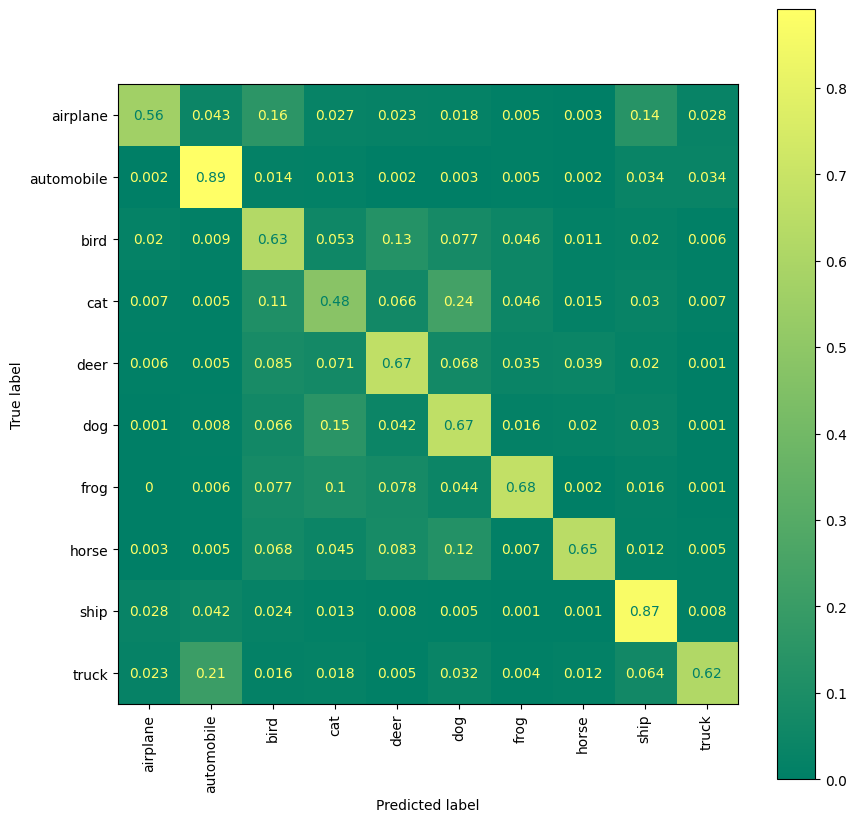

In [ ]:
#Evaluate the confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# save the prediction and labels as we loop through the data
label_list = []
prediction_list = []


for batch in test_dataloader:
    images, labels = batch
    predicted = new_CNN_model.predict(images)

    label_list.extend(list(labels.numpy()))
    prediction_list.extend(list(predicted.numpy()))


# calculate the confusion matrix and plot
cm = confusion_matrix(label_list, prediction_list, normalize="true")

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

We can also visualize individual predictions to better understand where the model is making mistakes. We want to see if these are these mistakes a human would make, or if there is there something fundamentally amiss how our model operates:

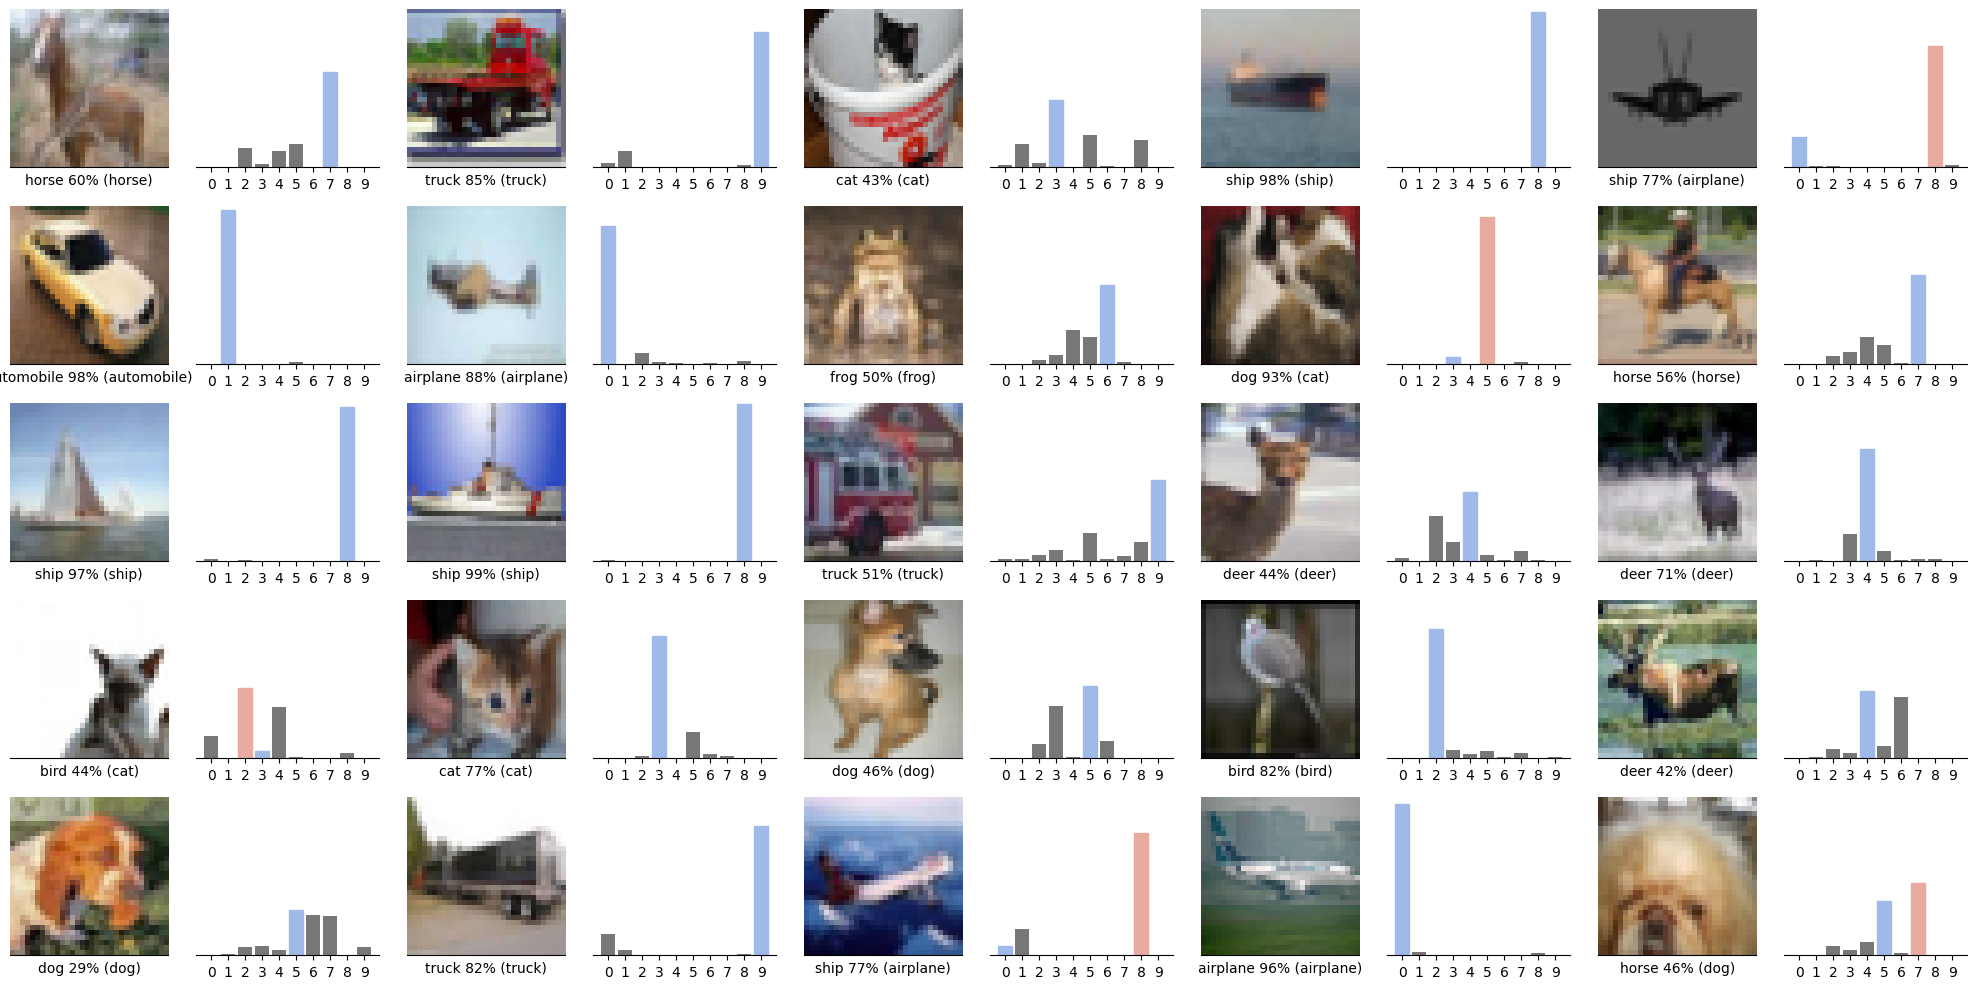

In [ ]:
# Plot the predicted probabilities for individual images
# Based on: https://www.kaggle.com/faressayah/cifar-10-image-classification-using-cnns-88

def plot_image(predictions, true_label, image):
    """Plot the image with custom title."""

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # transform back our image to the right scale and form
    inverse_normalized = image.transpose(0, 2).transpose(0,1) * (0.5) + 0.5
    plt.imshow(inverse_normalized, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions)
    predicted_class, true_class = class_labels[int(predicted_label)], class_labels[int(true_label)]
    label_text = f"{predicted_class} {100*np.max(predictions):2.0f}% ({true_class})"

    plt.xlabel(label_text, color="black", fontsize=10)

def plot_value_array(predictions, true_label):
    """Plot the predicted probabilities with color coding."""

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions)

    thisplot[predicted_label].set_color('#e7aba0')
    thisplot[true_label].set_color('#9fb9e8')


num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

np.random.seed(1)
sample_indices = np.random.choice(len(test_dataset), num_images, replace=False)

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

# Turn on "Evaluation mode"
new_CNN_model.eval()

for i, sample_idx in enumerate(sample_indices):
    input_image, label = test_dataset[sample_idx]
    predictions = new_CNN_model(input_image.unsqueeze(0)).squeeze()

    predictions = predictions.data.numpy()

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions, label, input_image)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions, label)

plt.tight_layout()
sns.despine(left=True)
plt.show()

### What does the CNN model predict for randomized input?

Using the same plot, we can look at how the model behaves if provided random input. Surprisingly, we almost always get the same prediction despite the randomness in input.

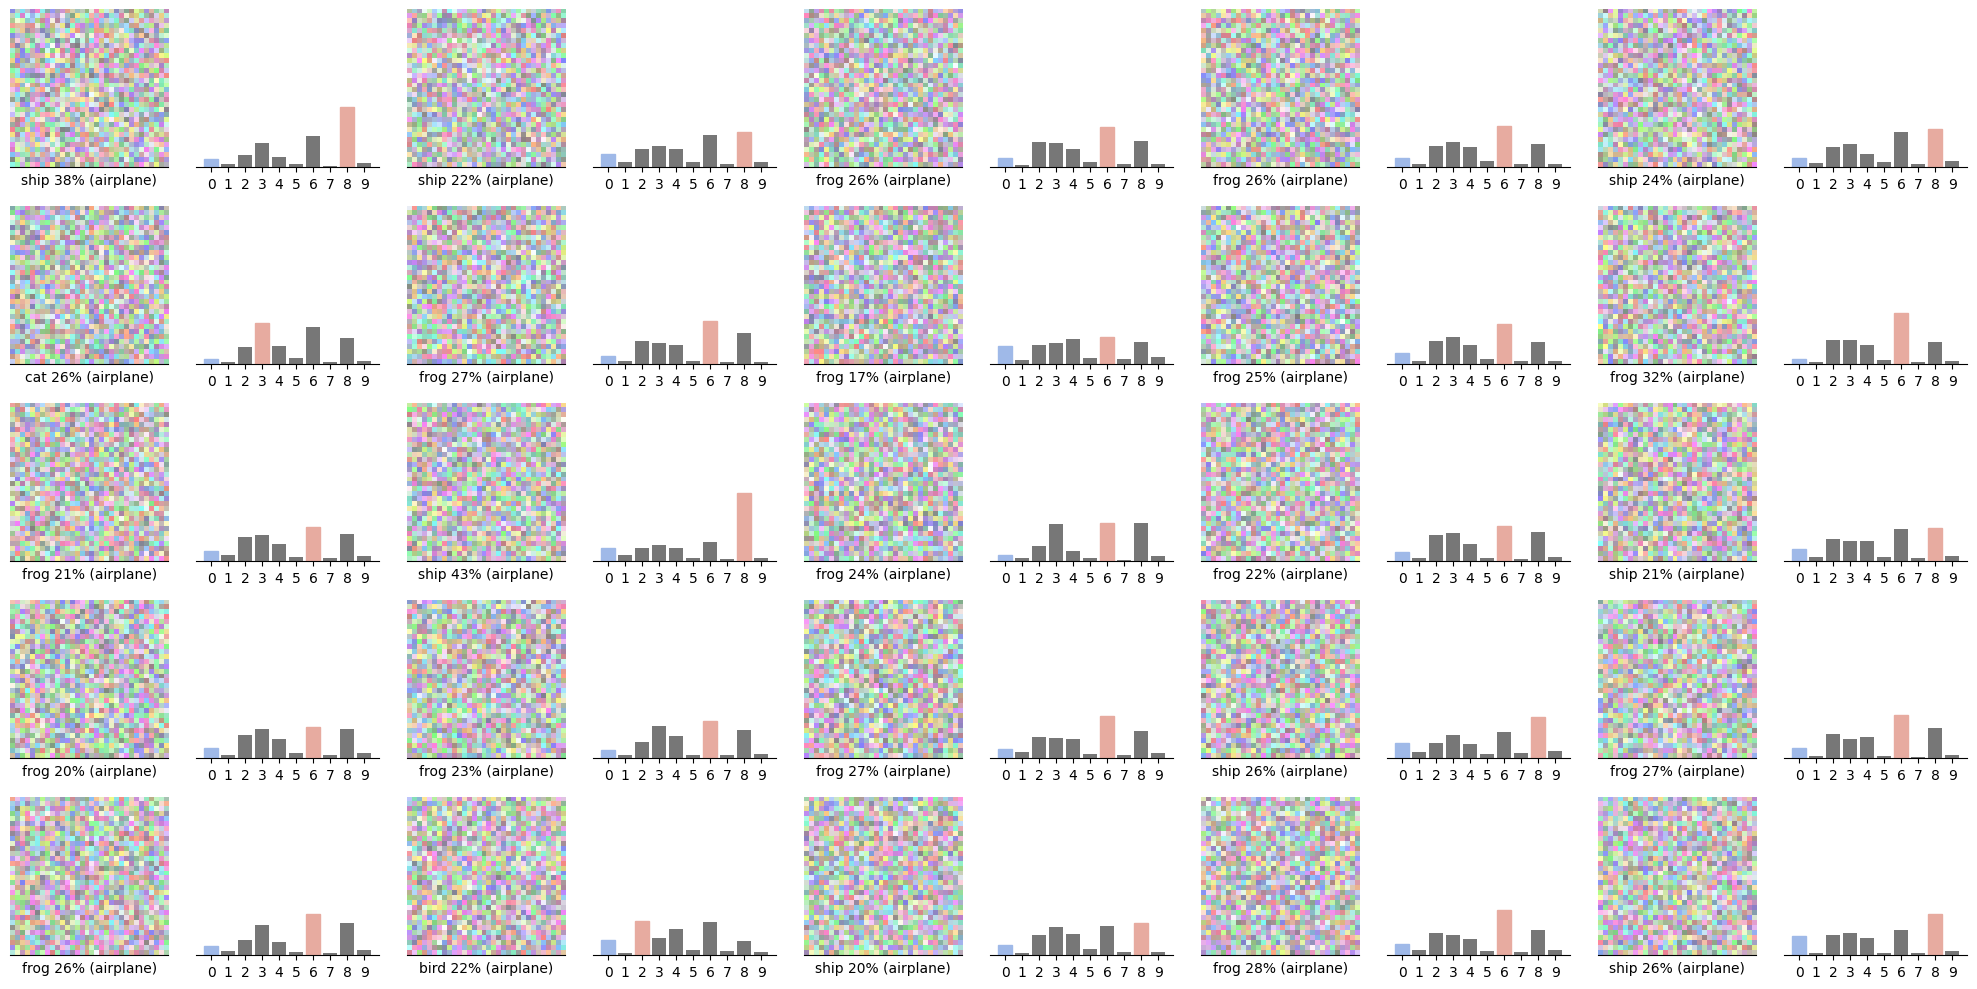

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

sample_indices = np.random.choice(len(test_dataset), num_images, replace=False)

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

new_CNN_model.eval()
for i, sample_idx in enumerate(sample_indices):
    input_image, label = torch.rand(3, 32, 32), torch.tensor([0]) # random input and dummy target
    predictions = new_CNN_model(input_image.unsqueeze(0)).squeeze()
    predictions = predictions.data.numpy()


    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions, label, input_image)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions, label)

plt.tight_layout()
sns.despine(left=True)
plt.show()

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>